# Deep Convolutional AutoEncoder

Ref : https://github.com/arashsaber/Deep-Convolutional-AutoEncoder/blob/master/ConvolutionalAutoEncoder.py

Build a 2 layers auto-encoder with TensorFlow to compress images to a lower latent space and then reconstruct them.

### Overview

<img src="../../img/ae1.jpeg" width="500px">

<img src="../../img/ae2.png" width="500px">

<img src="../../img/lenet.png" width="500px">

### Dataset

- use some image from **cat and dog** dataset [(source)](https://www.kaggle.com/c/dogs-vs-cats/data) (dataset/cat200200.jpg)

### Setup

In [21]:
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from os import listdir
from PIL import Image

### Import data

In [144]:
dataset_path = '../../dataset/catdog-square/'

list_file = listdir(dataset_path)[0:5]
filepath = [dataset_path+name for name in list_file]

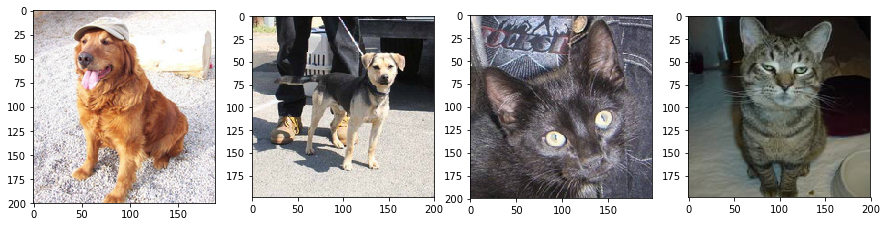

In [145]:
i = 1
plt.figure(figsize = (15,8))

for file in filepath[1:]:
    img = Image.open(file)
    img.thumbnail((200, 200), Image.ANTIALIAS) # resizes image in-place
    plt.subplot(1,4,i)
    plt.imshow(img)
    i = i + 1
plt.show()

### Encoder part (LENET-5):

- input layer
- convolution
- maxpool
- drop out
- fully connected
- drop out
- fully connected

Input Layer

In [170]:
def jpeg_to_rgb(filename,label):
    image_string = tf.read_file(filename[1])
    image_decoded = tf.image.decode_jpeg(image_string)
    image_resized = tf.image.resize_images(image_decoded, [200, 200])
    return image_resized, label

In [146]:
filepath[1]

'../../dataset/catdog-square/dog2.jpg'

In [147]:
graph = tf.Graph()

with graph.as_default():
    image_string = tf.read_file(filepath[1])
    image_decoded = tf.image.decode_jpeg(image_string)
    image_resized = tf.image.resize_images(image_decoded, [200, 200])
#     image_resized

In [148]:
with tf.Session(graph=graph) as session:
    input_layer = session.run([image_resized])[0]

In [149]:
print('Input Matrix Dimension :', input_layer.shape)
print('Green Layer Dimension :', input_layer[:,:,0].shape)

Input Matrix Dimension : (200, 200, 3)
Green Layer Dimension : (200, 200)


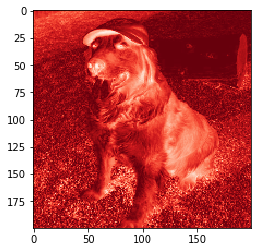

In [150]:
plt.imshow(input_layer[:,:,0],cmap="Reds")

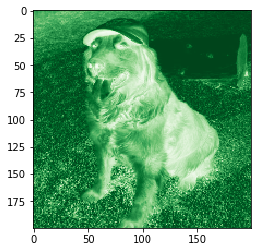

In [151]:
plt.imshow(input_layer[:,:,1],cmap="Greens")

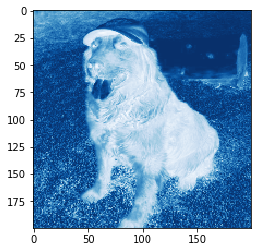

In [169]:
plt.imshow(input_layer[:,:,2],cmap='Blues')

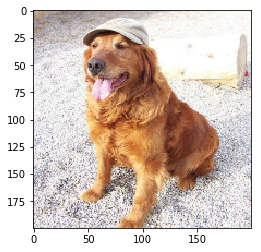

In [165]:
plt.imshow(input_layer.astype(int)/255)

In [99]:
input_layer[0][:,:,0]

array([[183.     , 180.84   , 191.56   , ..., 250.83997, 250.72003,
        250.63998],
       [179.     , 177.01999, 189.28   , ..., 243.66003, 246.67981,
        252.90004],
       [179.     , 175.48   , 183.84   , ..., 254.59991, 253.88013,
        246.63998],
       ...,
       [192.     , 234.66   , 250.78   , ..., 225.08023, 222.22083,
        214.09917],
       [165.     , 199.     , 228.6    , ..., 210.08044, 173.27759,
        248.1597 ],
       [226.     , 188.5    , 223.31998, ..., 191.76059, 245.38013,
        240.54022]], dtype=float32)

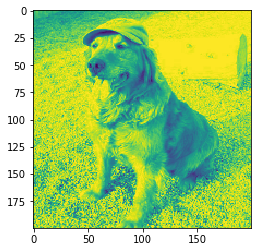

In [101]:
# img = Image.fromarray(input_layer[0][:,:,0], 'R')
plt.imshow(input_layer[0][:,:,0])

In [ ]:
img = Image.open('../../dataset/cat200200.jpg')
img.thumbnail((200, 200), Image.ANTIALIAS) # resizes image in-place
imgplot = plt.imshow(img)

In [ ]:
# Reads an image from a file, decodes it into a dense tensor, and resizes it to a fixed shape.
def _parse_function(filename, label):
    image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string)
    image_resized = tf.image.resize_images(image_decoded, [160, 90])
    return image_resized, label

dataset = dataset.map(_parse_function)

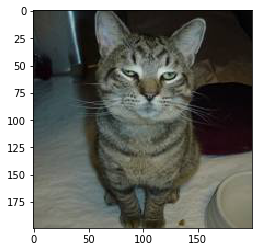

In [30]:
img = Image.open('../../dataset/cat200200.jpg')
img.thumbnail((200, 200), Image.ANTIALIAS) # resizes image in-place
imgplot = plt.imshow(img)

The layers are as follows:

In [29]:
image_size = 200 # 200x200
num_channels = 3 # red, blue, green

Decoder part (LENET-5):

- fully connected
- drop out
- fully connected
- drop out
- deconvolution
- upsample
- fully connected

In [16]:
# A vector of filenames.
filenames = tf.constant(filepath)

# `labels[i]` is the label for the image in `filenames[i].
labels = tf.constant([1])

dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

ValueError: Dimensions 5 and 1 are not compatible

Transform

In [13]:
# Reads an image from a file, decodes it into a dense tensor, and resizes it to a fixed shape.
def _parse_function(filename, label):
    image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string)
    image_resized = tf.image.resize_images(image_decoded, [160, 90])
    return image_resized, label

dataset = dataset.map(_parse_function)

Load

In [14]:
# create TensorFlow Iterator object
iterator = tf.data.Iterator.from_structure(dataset.output_types,dataset.output_shapes)
next_element = iterator.get_next()

# create initialization
dataset_init_op = iterator.make_initializer(dataset)

End of dataset.


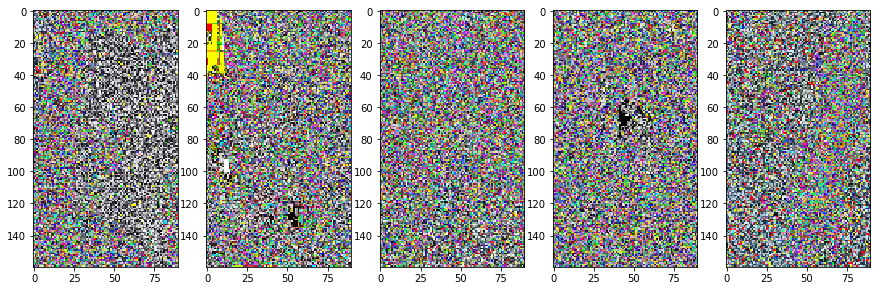

In [15]:
with tf.Session() as sess:

    # initialize the iterator on the training data
    sess.run(dataset_init_op)

    # get each element of the training dataset until the end is reached
    i = 1
    plt.figure(figsize = (15,8))
    while True:
        try:
            elem = sess.run(next_element)
            plt.subplot(1,5,i)
            plt.imshow(elem[0])
            i = i + 1
        except tf.errors.OutOfRangeError:
            print("End of dataset.")
            break
    plt.show()